In [ ]:

import _init_
from constants import *
from set_path import *
from config import *
from functions import *



In [ ]:

folder_list = ['SummitData/GasGravity/Production2pc/R4/', 'SummitData/GasGravity/Production2pc/R4-0.2Zsol/', \
               'SummitData/GasGravity/Production2pc/R8/', 'SummitData/GasGravity/Production2pc/R8-0.2Zsol/',\
              'SetonixData/R16/4pc/','SetonixData/R16-0.2Zsol/4pc/']



# folder_list = [ 'SummitData/GasGravity/Production2pc/R4-h75-0.2Zsol',\
#               'SummitData/GasGravity/Production2pc/R16-h300-Zsol/']


# Burstiness Parameter

In [ ]:
#### 
sigma_sfr = [ 0.000398107/yr_to_sec, 0.000398107/yr_to_sec, \
               6.e-5/yr_to_sec , 6.e-5/yr_to_sec , 1.58e-6/yr_to_sec, 1.58e-6/yr_to_sec]

height = 0.5 * kpc
color =sns.color_palette("rocket",n_colors=3) 

sfr = np.asarray(sigma_sfr) * Msun * 1.e2

fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.0, 'hspace':0.0},figsize=(10, 6))
kk=0
ls = ['-', '--']
label = [r'$Z_{\odot}$', r'$0.2Z_{\odot}$']
for folder in folder_list[2:4]:
    data_path = os.path.join('/g/data/jh2/av5889/quokka_myrepo/quokka/sims/', folder)
    print(data_path)
    
    os.chdir(data_path)
    list_file = glob.glob("proj_y_plt*")
    infile   = os.path.join(data_path, 'metal_uniform.in')

    dom_min, dom_max, ncells = getdomain(infile)
    fac = 1
    zrange = np.linspace(dom_min[2], dom_max[2], (fac*int(ncells[2])))
    xrange = np.linspace(dom_min[0], dom_max[0], (fac*int(ncells[0])))
    yrange = np.linspace(dom_min[1], dom_max[1], (fac*int(ncells[1])))


    dx = (dom_max[0]- dom_min[0])/(fac*int(ncells[0]))

    tot_mass_flux = np.zeros((len(list_file),xrange.shape[0], zrange.shape[0]))

    i=0
    for f in list_file[0:50]:
        inputfile = os.path.join(data_path, f)

        ds   = yt.load(inputfile)
        data = ds.covering_grid(level=0, left_edge=dom_min, dims=ds.domain_dimensions)
        
        curr_timestep = ds.current_time.to('Myr')

        mass_flux = np.array(data['mass_outflow'])[:,0,:]
        tot_mass_flux[i,:] = np.array(data['mass_outflow'])[:,0,:]
        i+=1  
        
    
    sign = zrange/np.abs(zrange)
    
    eta = (np.sum(tot_mass_flux, axis=1))

    eta_tavg = np.average(eta,axis=0)*sign
    
    eta_16 = np.percentile(eta, 16, axis=0)
    eta_84 = np.percentile(eta, 84, axis=0)
    burst = (eta_84 - eta_16)/eta_tavg
    burst_avg = (burst + burst[::-1])/2.
    
    ax.plot(zrange/kpc, burst_avg, color=color[kk], ls =ls[kk], label=label[kk])

    kk+=1
    
    
ax.set_ylabel(r'$\eta$')
ax.set_xlim(0.5, np.amax(zrange)/kpc)
ax.legend()
plt.setp(ax, ('ylim'), (0.0, 3.))

In [ ]:
fig, ax = plt.subplots(1, 2, gridspec_kw = {'wspace':0.0, 'hspace':0.0},figsize=(14, 6))

ax[0].plot(np.asarray(harray)/kpc, phi_avg[0], 'o', ls='-', color='mediumvioletred', label=r'$Z_{\odot}$')
ax[0].fill_between(np.asarray(harray)/kpc, phi_16[0], phi_84[0], ls='-', color='gray', alpha=0.2)

ax[1].plot(np.asarray(harray)/kpc, phi_avg[1], 'o', ls='-', color='forestgreen', label=r'$0.2Z_{\odot}$')
ax[1].fill_between(np.asarray(harray)/kpc, phi_16[1], phi_84[1], ls='-', color='gray', alpha=0.2)

plt.setp(ax, 'ylim', (-0.05, 0.25))

ax[0].tick_params(axis='y',  right=True, left=True)
ax[1].tick_params(axis='y', labelleft=False, labelright=False, right=True, left=True)
ax[0].legend()
ax[1].legend()

# Burstiness for h neq 150 pc

In [ ]:
sigma_sfr = [ 0.000398107/yr_to_sec, 1.58e-6/yr_to_sec] 

name = ['R4-h75', 'R16-h300']

folder_list = ['SummitData/GasGravity/Production2pc/R4/', 'SummitData/GasGravity/Production2pc/R4-0.2Zsol/', \
               'SummitData/GasGravity/Production2pc/R8/', 'SummitData/GasGravity/Production2pc/R8-0.2Zsol/',\
              'SetonixData/R16/4pc/','SetonixData/R16-0.2Zsol/4pc/']

height = 0.5 * kpc
color =sns.color_palette("rocket",n_colors=3) 

sfr = np.asarray(sigma_sfr) * Msun * 1.e2


fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.0, 'hspace':0.0},figsize=(10, 6))
kk=0
ls = ['-', '--']
label = [r'R4-h74', r'$R16-h300$']
for folder in folder_list:
    data_path = os.path.join('/g/data/jh2/av5889/quokka_myrepo/quokka/sims/', folder)
    print(data_path)
    
    os.chdir(data_path)
    list_file = glob.glob("proj_y_plt*")
    infile   = os.path.join(data_path, 'metal_uniform.in')

    dom_min, dom_max, ncells = getdomain(infile)
    fac = 1
    zrange = np.linspace(dom_min[2], dom_max[2], (fac*int(ncells[2])))
    xrange = np.linspace(dom_min[0], dom_max[0], (fac*int(ncells[0])))
    yrange = np.linspace(dom_min[1], dom_max[1], (fac*int(ncells[1])))


    dx = (dom_max[0]- dom_min[0])/(fac*int(ncells[0]))

    tot_mass_flux = np.zeros((len(list_file),xrange.shape[0], zrange.shape[0]))

    i=0
    for f in list_file:
        inputfile = os.path.join(data_path, f)
    
        file_size = get_folder_size(inputfile) / (1024 * 1024)
        
        if(file_size<1.):
            print('Skipping ', inputfile, '\n')
            continue
            
        ds   = yt.load(inputfile)
        data = ds.covering_grid(level=0, left_edge=dom_min, dims=ds.domain_dimensions)
        
        curr_timestep = ds.current_time.to('Myr')

        mass_flux = np.array(data['mass_outflow'])[:,0,:]
        tot_mass_flux[i,:] = np.array(data['mass_outflow'])[:,0,:]
        i+=1  
        
        
    
    sign = zrange/np.abs(zrange)
    
    eta = (np.sum(tot_mass_flux, axis=1))

    eta_tavg = np.average(eta,axis=0)*sign
    
    eta_16 = np.percentile(eta, 16, axis=0)
    eta_84 = np.percentile(eta, 84, axis=0)
    burst = (eta_84 - eta_16)/eta_tavg
    burst_avg = (burst + burst[::-1])/2.
    
    ax.plot(zrange/kpc, burst_avg, color=color[kk], ls =ls[kk], label=label[kk])

    kk+=1
    
    
ax.set_ylabel(r'$\eta$')
ax.set_xlim(0.5, np.amax(zrange)/kpc)
ax.legend()
plt.setp(ax, ('ylim'), (0.0, 10.))

# Mass Loading 

yt : [INFO     ] 2024-08-28 18:38:44,525 Parameters: current_time              = 3831759926055774.5
yt : [INFO     ] 2024-08-28 18:38:44,527 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-28 18:38:44,528 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-28 18:38:44,530 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SummitData/GasGravity/Production2pc/R4-0.2Zsol/


yt : [INFO     ] 2024-08-28 18:38:45,485 Parameters: current_time              = 4802318615204617.0
yt : [INFO     ] 2024-08-28 18:38:45,487 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-28 18:38:45,488 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-28 18:38:45,490 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-28 18:38:46,421 Parameters: current_time              = 2225200593092499.5
yt : [INFO     ] 2024-08-28 18:38:46,423 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-28 18:38:46,424 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-28 18:38:46,425 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-28 18:38:47,276 Parameters: current_time              = 3746565408933140.5
yt : [INFO     ] 2024-08-28 18:38:

yt : [INFO     ] 2024-08-28 18:39:04,672 Parameters: current_time              = 1092637224294284.6
yt : [INFO     ] 2024-08-28 18:39:04,674 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-28 18:39:04,675 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-28 18:39:04,676 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-28 18:39:05,682 Parameters: current_time              = 5181390078915578.0
yt : [INFO     ] 2024-08-28 18:39:05,683 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-28 18:39:05,684 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-28 18:39:05,686 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-28 18:39:06,864 Parameters: current_time              = 4674616932122231.0
yt : [INFO     ] 2024-08-28 18:39:

yt : [INFO     ] 2024-08-28 18:39:24,464 Parameters: current_time              = 1147885410484034.5
yt : [INFO     ] 2024-08-28 18:39:24,466 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-28 18:39:24,467 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-28 18:39:24,468 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-28 18:39:25,487 Parameters: current_time              = 448918158196031.94
yt : [INFO     ] 2024-08-28 18:39:25,489 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-28 18:39:25,490 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-28 18:39:25,491 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-28 18:39:26,389 Parameters: current_time              = 4081244390206827.0
yt : [INFO     ] 2024-08-28 18:39:

/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SummitData/GasGravity/Production2pc/R8-0.2Zsol/


yt : [INFO     ] 2024-08-28 18:39:37,251 Parameters: current_time              = 2445347387600728.5
yt : [INFO     ] 2024-08-28 18:39:37,252 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-28 18:39:37,254 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-28 18:39:37,255 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-28 18:39:38,353 Parameters: current_time              = 6062279817809211.0
yt : [INFO     ] 2024-08-28 18:39:38,355 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-28 18:39:38,356 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-28 18:39:38,357 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-28 18:39:39,366 Parameters: current_time              = 6026606490672288.0
yt : [INFO     ] 2024-08-28 18:39:

yt : [INFO     ] 2024-08-28 18:39:57,669 Parameters: current_time              = 1438645164078513.8
yt : [INFO     ] 2024-08-28 18:39:57,671 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-28 18:39:57,672 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-28 18:39:57,673 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-28 18:39:58,775 Parameters: current_time              = 2331023082801178.0
yt : [INFO     ] 2024-08-28 18:39:58,776 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-28 18:39:58,778 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-28 18:39:58,779 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-28 18:39:59,828 Parameters: current_time              = 2806202766840993.0
yt : [INFO     ] 2024-08-28 18:39:

yt : [INFO     ] 2024-08-28 18:40:17,267 Parameters: current_time              = 6009978725734348.0
yt : [INFO     ] 2024-08-28 18:40:17,269 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-28 18:40:17,270 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-28 18:40:17,272 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-28 18:40:18,259 Parameters: current_time              = 2766197641549027.5
yt : [INFO     ] 2024-08-28 18:40:18,261 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-08-28 18:40:18,262 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-08-28 18:40:18,264 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-08-28 18:40:19,352 Parameters: current_time              = 3365914093130080.5
yt : [INFO     ] 2024-08-28 18:40:

/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/R16-0.2Zsol/4pc/


yt : [INFO     ] 2024-08-28 18:40:29,168 Parameters: current_time              = 6083275366984045.0
yt : [INFO     ] 2024-08-28 18:40:29,169 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-28 18:40:29,171 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-28 18:40:29,172 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]
yt : [INFO     ] 2024-08-28 18:40:29,695 Parameters: current_time              = 6839634091359872.0
yt : [INFO     ] 2024-08-28 18:40:29,697 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-28 18:40:29,698 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-28 18:40:29,699 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]
yt : [INFO     ] 2024-08-28 18:40:30,220 Parameters: current_time              = 5326332170238982.0
yt : [INFO     ] 2024-08-28 18:40:

yt : [INFO     ] 2024-08-28 18:40:39,175 Parameters: current_time              = 1934636603562496.5
yt : [INFO     ] 2024-08-28 18:40:39,177 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-28 18:40:39,178 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-28 18:40:39,180 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]
yt : [INFO     ] 2024-08-28 18:40:39,665 Parameters: current_time              = 519967853992013.44
yt : [INFO     ] 2024-08-28 18:40:39,666 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-28 18:40:39,667 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-28 18:40:39,669 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]
yt : [INFO     ] 2024-08-28 18:40:40,197 Parameters: current_time              = 1683831428430089.0
yt : [INFO     ] 2024-08-28 18:40:

yt : [INFO     ] 2024-08-28 18:40:49,009 Parameters: current_time              = 3375809353276887.5
yt : [INFO     ] 2024-08-28 18:40:49,010 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-28 18:40:49,012 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-28 18:40:49,013 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]
yt : [INFO     ] 2024-08-28 18:40:49,497 Parameters: current_time              = 3588838039988837.5
yt : [INFO     ] 2024-08-28 18:40:49,499 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-08-28 18:40:49,500 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-08-28 18:40:49,501 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]
yt : [INFO     ] 2024-08-28 18:40:49,977 Parameters: current_time              = 2364146703598512.5
yt : [INFO     ] 2024-08-28 18:40:

[Text(0.5, 0, 'z [kpc]'), Text(0.5, 0, 'z [kpc]'), Text(0.5, 0, 'z [kpc]')]

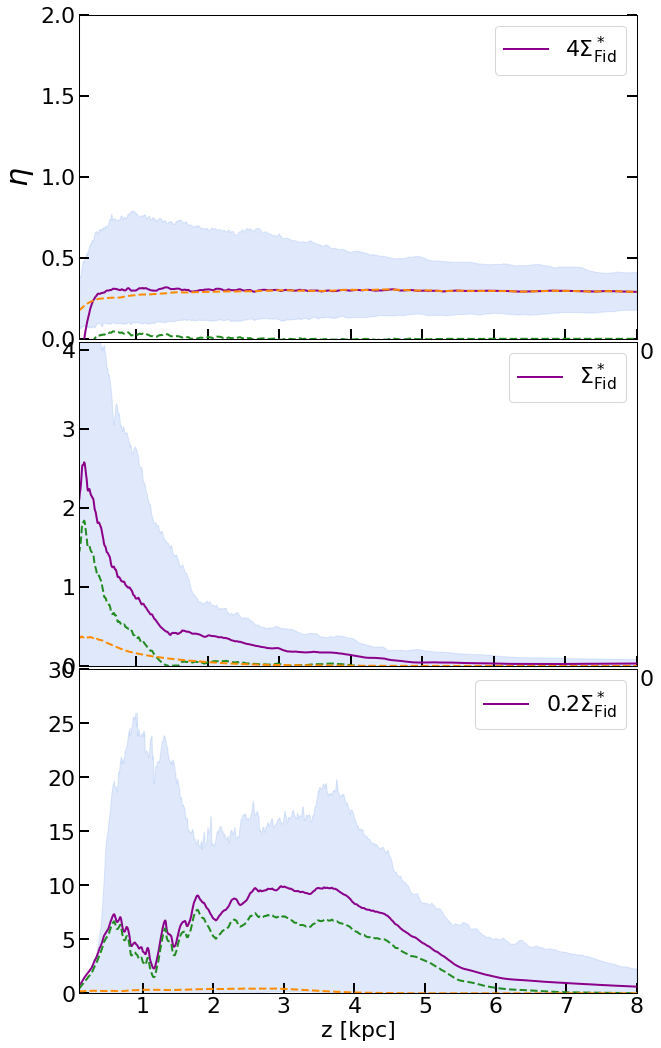

In [8]:

folder_list = ['SummitData/GasGravity/Production2pc/R4-0.2Zsol/',  \
               'SummitData/GasGravity/Production2pc/R8-0.2Zsol/',\
              'SetonixData/R16-0.2Zsol/4pc/']
label = [r'$4\Sigma_{\rm Fid}^*$', r'$\Sigma_{\rm Fid}^*$', r'0.2$\Sigma_{\rm Fid}^*$']

# folder_list = ['SummitData/GasGravity/Production2pc/R4/',  \
#                'SummitData/GasGravity/Production2pc/R8/',\
#               'SetonixData/R16/4pc/']
# label = [r'$4\Sigma_{\rm Fid}$', r'$\Sigma_{\rm Fid}$', r'0.2$\Sigma_{\rm Fid}$']


sigma_sfr = [ 0.000398107/yr_to_sec,\
               6.e-5/yr_to_sec ,\
               1.58e-6/yr_to_sec]
kk= 0
color =sns.color_palette("rocket",n_colors=3) 

sfr = np.asarray(sigma_sfr) * Msun * 1.e2

fig, ax = plt.subplots(3, 1, gridspec_kw = {'wspace':0.01, 'hspace':0.01},figsize=(10, 18))

for folder in folder_list:
    data_path = os.path.join('/g/data/jh2/av5889/quokka_myrepo/quokka/sims/', folder)
    print(data_path)
    
    os.chdir(data_path)
    list_file1 = glob.glob("proj_y_plt*")
    list_file = list_file1[0:50]
    infile   = os.path.join(data_path, 'metal_uniform.in')

    dom_min, dom_max, ncells = getdomain(infile)
    fac = 1
    zrange = np.linspace(dom_min[2], dom_max[2], (fac*int(ncells[2])))
    xrange = np.linspace(dom_min[0], dom_max[0], (fac*int(ncells[0])))
    yrange = np.linspace(dom_min[1], dom_max[1], (fac*int(ncells[1])))


    dx = (dom_max[0]- dom_min[0])/(fac*int(ncells[0]))
    dy = (dom_max[1]- dom_min[1])/(fac*int(ncells[1]))

    tot_mass_flux = np.zeros((len(list_file),xrange.shape[0], zrange.shape[0]))
    wtot_mass_flux = np.zeros((len(list_file),xrange.shape[0], zrange.shape[0]))
    htot_mass_flux = np.zeros((len(list_file),xrange.shape[0], zrange.shape[0]))

    i=0
    for f in list_file:
        inputfile = os.path.join(data_path, f)
    
        file_size = get_folder_size(inputfile) / (1024 * 1024)
        
        if(file_size<1.):
            print('Skipping ', inputfile, '\n')
            continue
            
        ds   = yt.load(inputfile)
        data = ds.covering_grid(level=0, left_edge=dom_min, dims=ds.domain_dimensions)
        
        curr_timestep = ds.current_time.to('Myr')

        tot_mass_flux[i,:] = np.array(data['mass_outflow'])[:,0,:]*dx
        wtot_mass_flux[i,:] = np.array(data['warm_mass_outflow'])[:,0,:]*dx
        htot_mass_flux[i,:] = np.array(data['hot_mass_outflow'])[:,0,:]*dx
        i+=1  
        
    sign = zrange/np.abs(zrange)
    
    eta = np.sum(tot_mass_flux, axis=1)*sign/sfr[kk]
    etaW = np.sum(wtot_mass_flux, axis=1)*sign/sfr[kk]
    etaH = np.sum(htot_mass_flux, axis=1)*sign/sfr[kk]

    eta_tavg = np.average(eta,axis=0)
    etaW_tavg = np.average(etaW,axis=0)
    etaH_tavg = np.average(etaH,axis=0)
    
    eta_16 = np.percentile(eta, 16, axis=0)
    eta_84 = np.percentile(eta, 84, axis=0)
    
    eta_16_tot = (eta_16 + eta_16[::-1])/2
    eta_84_tot = (eta_84 + eta_84[::-1])/2
    
    ax[kk].plot(zrange/kpc, eta_tavg, color='darkmagenta', lw=2.0, ls ='-', label=label[kk])
    ax[kk].plot(zrange/kpc, etaW_tavg, color='forestgreen', lw=2.0, ls ='--')
    ax[kk].plot(zrange/kpc, etaH_tavg, color='darkorange', lw=2.0, ls ='--')
    
    ax[kk].fill_between(zrange/kpc, eta_16_tot, eta_84_tot, ls='-',\
                        color='cornflowerblue', alpha=0.2)
    ax[kk].set_xlim(0.1, np.amax(zrange)/kpc)
    ax[kk].legend()
    
    kk+=1
    
ax[0].set_ylabel(r'$\eta$', fontsize =30)
ax[0].tick_params(axis='y',  right=True, left=True)

plt.setp(ax, ('ylim'), (0.0, 30.))
ax[0].set_ylim(0.0, 2.0)
ax[1].set_ylim(0.0, 4.1)
ax[2].set_ylim(0.0, 30.0)
plt.setp(ax, 'xlabel', 'z [kpc]')

# Mass Loading for scale neq 150 pc 

In [ ]:
sigma_sfr = [ 0.000398107/yr_to_sec, 1.58e-6/yr_to_sec] 

name = ['R4-h75', 'R16-h300']

folder_list = [ 'SummitData/GasGravity/Production2pc/R4-h75-0.2Zsol',\
              'SummitData/GasGravity/Production2pc/R16-h300-Zsol/']

height = 0.5 * kpc
color =sns.color_palette("rocket",n_colors=3) 

sfr = np.asarray(sigma_sfr) * Msun * 1.e2


fig, ax = plt.subplots(1, 2, gridspec_kw = {'wspace':0.0, 'hspace':0.0},figsize=(14, 6))
kk=0
ls = ['-', '--']
label = [r'R4-h74', r'$R16-h300$']
for folder in folder_list:
    data_path = os.path.join('/g/data/jh2/av5889/quokka_myrepo/quokka/sims/', folder)
    print(data_path)
    
    os.chdir(data_path)
    list_file = glob.glob("proj_y_plt*")
    infile   = os.path.join(data_path, 'metal_uniform.in')

    dom_min, dom_max, ncells = getdomain(infile)
    fac = 1
    zrange = np.linspace(dom_min[2], dom_max[2], (fac*int(ncells[2])))
    xrange = np.linspace(dom_min[0], dom_max[0], (fac*int(ncells[0])))
    yrange = np.linspace(dom_min[1], dom_max[1], (fac*int(ncells[1])))


    dx = (dom_max[0]- dom_min[0])/(fac*int(ncells[0]))
    dy = (dom_max[1]- dom_min[1])/(fac*int(ncells[1]))

    tot_mass_flux = np.zeros((len(list_file),xrange.shape[0], zrange.shape[0]))

    i=0
    for f in list_file:
        inputfile = os.path.join(data_path, f)
    
        file_size = get_folder_size(inputfile) / (1024 * 1024)
        
        if(file_size<1.):
            print('Skipping ', inputfile, '\n')
            continue
            
        ds   = yt.load(inputfile)
        data = ds.covering_grid(level=0, left_edge=dom_min, dims=ds.domain_dimensions)
        
        curr_timestep = ds.current_time.to('Myr')

        tot_mass_flux[i,:] = np.array(data['mass_outflow'])[:,0,:]*dx
        i+=1  
        
    sign = zrange/np.abs(zrange)
    
    eta = np.sum(tot_mass_flux, axis=1)*sign/sfr[kk]

    eta_tavg = np.average(eta,axis=0)
    
    eta_16 = np.percentile(eta, 16, axis=0)
    eta_84 = np.percentile(eta, 84, axis=0)
    
    eta_16_tot = (eta_16 + eta_16[::-1])/2
    eta_84_tot = (eta_84 + eta_84[::-1])/2
    
    ax[kk].plot(zrange/kpc, eta_tavg, color=color[kk], ls =ls[kk], label=label[kk])
    ax[kk].fill_between(zrange/kpc, eta_16_tot, eta_84_tot, ls='-', color='gray', alpha=0.2)
    ax[kk].set_xlim(0.0, np.amax(zrange)/kpc)
    kk+=1
    
ax[0].set_ylabel(r'$\eta$')
ax[0].tick_params(axis='y',  right=True, left=True)
ax[1].tick_params(axis='y', labelleft=False, labelright=False, right=True, left=True)
ax[0].legend()
ax[1].legend()
ax[1].set_xlim(0.1, np.amax(zrange)/kpc)
plt.setp(ax, ('ylim'), (0.0, 10.))

In [ ]:
eta_16

In [ ]:
def get_folder_size(directory):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            file_path = os.path.join(dirpath, filename)
            # Skip if it is symbolic link
            if not os.path.islink(file_path):
                total_size += os.path.getsize(file_path)
    return total_size